# Лабораторна робота #4
## З дисципліни Інтелектуальний аналіз даних
## Студента групи МІТ-31
## __Єрмакова Юрія__


## Базова ініціалізація

In [266]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [267]:
SHAPE = (5, 5)

1. Створити набір даних за допомогою DatasetGenerator

## CRUD - Create & Read

In [268]:
scalar = tf.constant(3.14)
scalar

<tf.Tensor: shape=(), dtype=float32, numpy=3.14>

In [269]:
vector = tf.constant([0, 0.5, 0.75, 0.9, 0.95, 0.97, 0.99, 1])
vector

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0.  , 0.5 , 0.75, 0.9 , 0.95, 0.97, 0.99, 1.  ], dtype=float32)>

In [270]:
matrix = tf.constant([
    [1, 0, 1, 100],
    [0, 1, 0, 200], 
    [1, 1, 1, 300], 
    [0, 0, 0, 400]
])
matrix

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[  1,   0,   1, 100],
       [  0,   1,   0, 200],
       [  1,   1,   1, 300],
       [  0,   0,   0, 400]])>

In [271]:
r1 = tf.random.Generator.from_seed(scalar) 
r1 = r1.normal(shape=SHAPE)
r1

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-1.864718  ,  0.802645  , -0.44321716,  0.13816683,  0.98388135],
       [-1.115804  ,  0.40637785,  0.28259084,  0.81372464,  1.1343659 ],
       [-0.468746  ,  0.09268467, -0.24583732, -0.1929815 , -2.2202897 ],
       [ 0.2772542 ,  1.2350408 , -0.45407975,  0.06111892,  0.24242434],
       [ 0.814582  ,  0.03914142, -1.0314549 ,  0.27103433, -0.67588985]],
      dtype=float32)>

In [272]:
r2 = tf.random.Generator.from_seed(scalar)
r2 = r2.normal(shape=SHAPE)
r2

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-1.864718  ,  0.802645  , -0.44321716,  0.13816683,  0.98388135],
       [-1.115804  ,  0.40637785,  0.28259084,  0.81372464,  1.1343659 ],
       [-0.468746  ,  0.09268467, -0.24583732, -0.1929815 , -2.2202897 ],
       [ 0.2772542 ,  1.2350408 , -0.45407975,  0.06111892,  0.24242434],
       [ 0.814582  ,  0.03914142, -1.0314549 ,  0.27103433, -0.67588985]],
      dtype=float32)>

In [273]:
tf.ones(SHAPE)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

## CRUD - Update

In [274]:
mut = tf.Variable(SHAPE)
mut[0].assign(100) 
mut

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([100,   5])>

In [275]:
const = tf.constant(SHAPE)
const

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 5])>

## CRUD - Delete

In [276]:
def delete_col(tensor, index):
    sub = list(range(tensor.shape[1]))
    sub.pop(index)
    return tf.transpose(tf.gather(tf.transpose(tensor), sub))

def delete_row(tensor, index):
    sub = list(range(tensor.shape[0]))
    sub.pop(index)
    return tf.gather(tensor,sub)

print(matrix)

matrix = delete_col(matrix, 2)
print(matrix)

delete_row(matrix, 1)
print(matrix)

tf.Tensor(
[[  1   0   1 100]
 [  0   1   0 200]
 [  1   1   1 300]
 [  0   0   0 400]], shape=(4, 4), dtype=int32)
tf.Tensor(
[[  1   0 100]
 [  0   1 200]
 [  1   1 300]
 [  0   0 400]], shape=(4, 3), dtype=int32)
tf.Tensor(
[[  1   0 100]
 [  0   1 200]
 [  1   1 300]
 [  0   0 400]], shape=(4, 3), dtype=int32)


Згенерувати набір даних для регресії та класифікації з використанням TensorFlow

Здійснити графічний аналіз наборів даних за допомогою Matplotlib

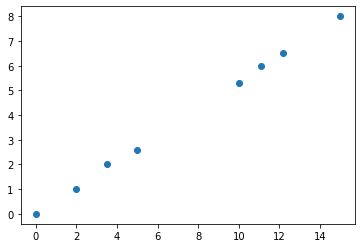

In [277]:
tf.random.set_seed(scalar)

data = tf.constant(['cat', 'dog', 'rat', 'pig'])

X = np.array([0, 2, 3.5, 5, 10, 11.1, 12.2, 15])
y = np.array([0, 1, 2.0, 2.6, 5.3, 6, 6.5, 8])

plt.scatter(X, y)

input_shape = X[0].shape
output_shape = y[0].shape

#### Split data into train and test

In [278]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [279]:
model = tf.keras.Sequential([ tf.keras.layers.Dense(1, activation='relu') ])

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy']) 

# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

# Fit the model (passing the lr_scheduler callback)
# history = model.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

# pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

In [281]:
tf.random.set_seed(3)

model = tf.keras.Sequential([ tf.keras.layers.Dense(4, activation='relu') ])

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=[ 'accuracy' ]) 

 # traverse a set of learning rate values starting from 1e-4, increasing by 10 ^ (epoch / 20) each epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

history = model.fit(X_train, y_train, epochs=100, callbacks=[ lr_scheduler ])

Epoch 1/100
1/1 [==============================] - 1s 564ms/step - loss: 35.0305 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 35.0303 - accuracy: 0.1250
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 35.0299 - accuracy: 0.1250
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 35.0295 - accuracy: 0.1250
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 35.0291 - accuracy: 0.1250
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 35.0287 - accuracy: 0.1250
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 35.0281 - accuracy: 0.1250
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 35.0275 - accuracy: 0.1250
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 35.0269 - accuracy: 0.1250
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 35.0261 - accuracy: 0.1250
Epoch 11/100
1/1 

<AxesSubplot:xlabel='epochs'>

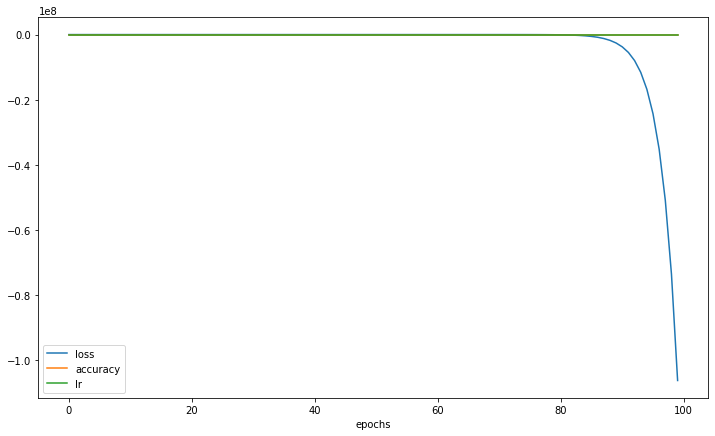

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,7), xlabel='epoches')

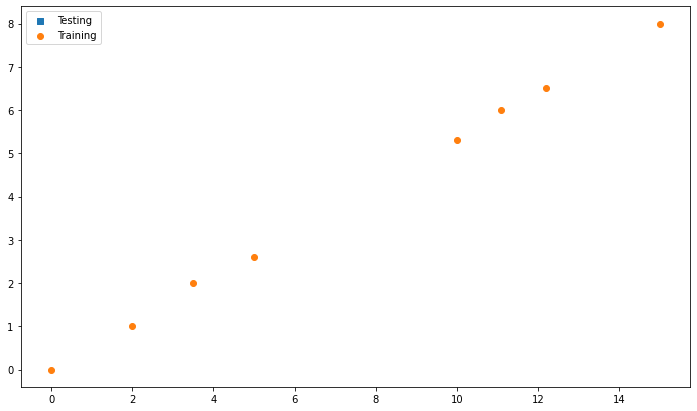

In [298]:
plt.figure(figsize=(12,7))
plt.scatter(X_test, y_test, label='Testing', marker='s')
plt.scatter(X_train, y_train, label='Training', marker='o')
plt.legend()